In [1]:
import pandas as pd

In [ ]:
%pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 18.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("comparisons.csv").sort_values("week_date")

FileNotFoundError: [Errno 2] No such file or directory: 'comparisons.csv'

In [24]:
pd.options.plotting.backend = "plotly"

In [26]:
df.groupby(["video_a", "video_b"]).size().value_counts()

1     34115
10    31408
9      3330
8      1799
7       827
      ...  
78        1
38        1
80        1
59        1
83        1
Length: 74, dtype: int64

In [68]:
df_2 = df[["public_username","video_a","video_b"]]

In [69]:
df

public_username      video_a      video_b             criteria  score  \
0                    0  xdk2Sargd3o  KyeJTbFCSv0  largely_recommended     -5   
1                    0  xdk2Sargd3o  cCi9Iwj55EU  largely_recommended      0   
2                    0  xdk2Sargd3o  cCi9Iwj55EU             pedagogy     -5   
3                    0  xdk2Sargd3o  cCi9Iwj55EU           importance    -10   
4                    0  xdk2Sargd3o  cCi9Iwj55EU      layman_friendly    -10   
...                ...          ...          ...                  ...    ...   
450997             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw        backfire_risk      1   
450998             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw           importance     -2   
450999             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw             pedagogy     -1   
451000             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw          reliability      0   
451001             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw  largely_recommended      0   

         week_date  
0       2023-01-09  
1       2023-01-09  
2       2023-01-09  
3       2023-01-09  
4       2023-01-09  
...            ...  
450997  2022-11-21  
450998  2022-11-21  
450999  2022-11-21  
451000  2022-11-21  
451001  2022-11-21  

[451002 rows x 6 columns]

In [70]:
df_2 = pd.melt(df_2, 
        id_vars=['public_username'], 
        value_vars=['video_a','video_b']).groupby("value").size().sort_values(ascending=False)

In [71]:
to_get_name = list(df_2.head(100).index)

In [73]:
df_2

value
R2fjRbc9Sa0    3701
url1TFdHlSI    3424
lYXQvHhfKuM    2876
sGLiSLAlwrY    2203
GuTgfnkILGs    2197
               ... 
Yy8tDcdUUJY       1
4_GJ0XQp09E       1
YwuJxomtO1o       1
4ZeVHKxXYXQ       1
fkb1G4RPwwU       1
Length: 16089, dtype: int64

In [85]:
top_10_contributors = df.query("criteria == 'largely_recommended'").groupby("public_username").size().sort_values(ascending=False).head(10).index


In [93]:
df_temp

public_username      video_a      video_b             criteria  score  \
3702          aidjango  23tz9ddQpqY  8k3V8OVQR0s  largely_recommended      2   
3718          aidjango  RBEncgypGrU  rStL7niR7gs  largely_recommended     10   
3728          aidjango  RBEncgypGrU  hOWB7o6XUSU  largely_recommended      9   
3738          aidjango  RBEncgypGrU  BE-cA4UK07c  largely_recommended      9   
3746          aidjango  RBEncgypGrU  fQEiyUj_Dn0  largely_recommended     10   
...                ...          ...          ...                  ...    ...   
446279            Zekk  XY1PUQ4NOuU  T6UzuDaPvqA  largely_recommended     -6   
446284            Zekk  XIh4CVtfhsA  T6UzuDaPvqA  largely_recommended     -5   
446294            Zekk  XIh4CVtfhsA  tKbV6BpH-C8  largely_recommended    -10   
446310            Zekk  T6UzuDaPvqA  tKbV6BpH-C8  largely_recommended     -8   
446316            Zekk  T6UzuDaPvqA  MAfRJ00WjeY  largely_recommended      1   

         week_date  
3702    2021-01-11  
3718    2021-01-11  
3728    2021-01-11  
3738    2021-01-11  
3746    2021-01-11  
...            ...  
446279  2023-02-20  
446284  2023-02-20  
446294  2023-02-20  
446310  2023-02-20  
446316  2023-02-20  

[26779 rows x 6 columns]

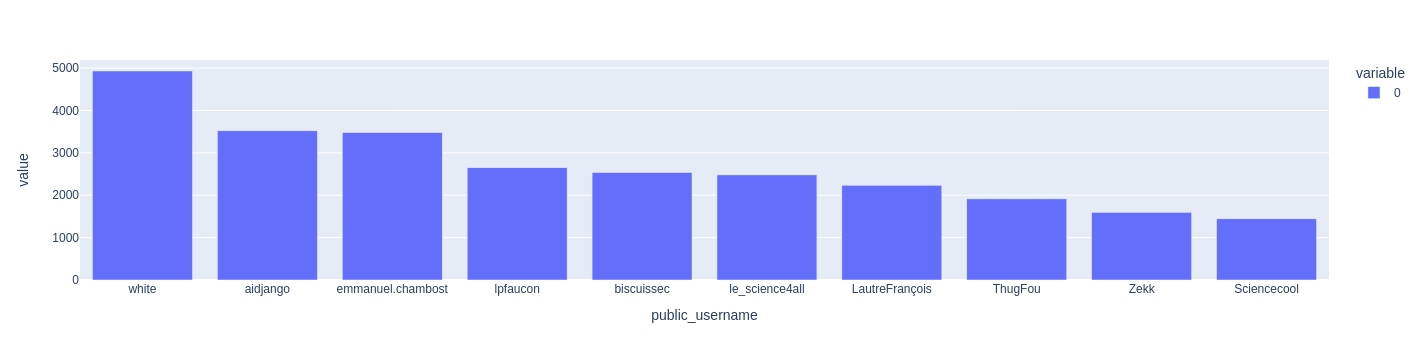

In [110]:
df.query("criteria == 'largely_recommended'").groupby("public_username").size().sort_values(ascending=False).head(10).plot(kind="bar")


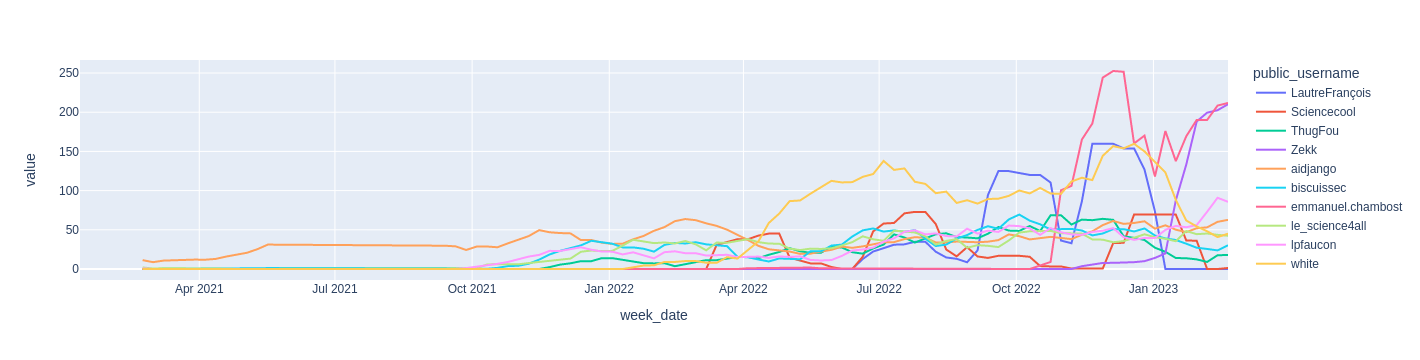

In [112]:
(df_temp
 .groupby(["week_date", "public_username"])
 .size()
 .reset_index()
 .pivot(index="week_date", columns="public_username")
 .fillna(0)
 .droplevel(0, axis=1)
).rolling(7).mean().plot()

In [ ]:
df_temp.pivot(index="week_date", columns="public_username")

In [92]:
df_temp = (
df.query("criteria == 'largely_recommended'").query("public_username in @top_10_contributors")

)

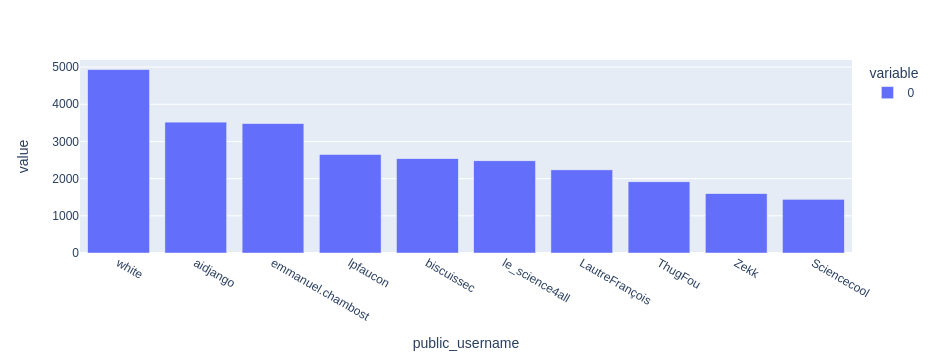

In [83]:
df.query("criteria == 'largely_recommended'").groupby("public_username").size().sort_values(ascending=False).head(10).plot(kind="bar")


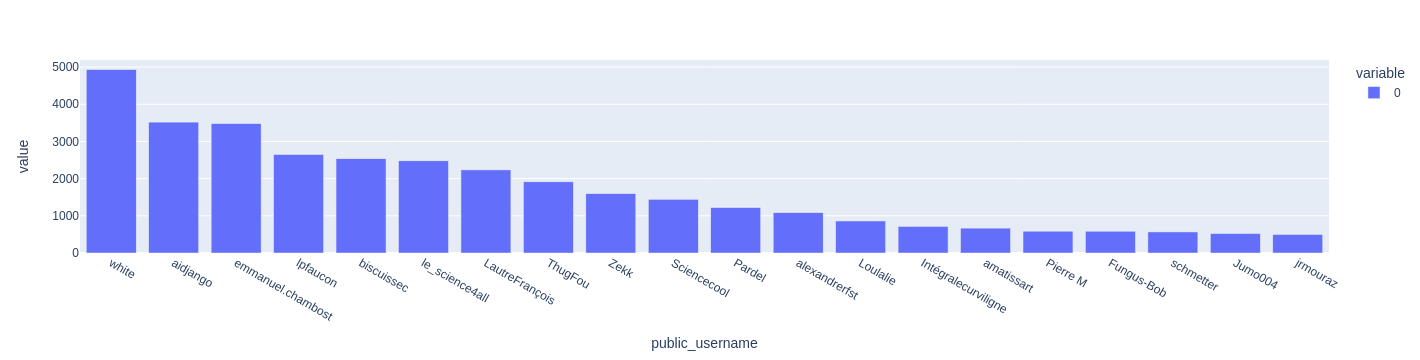

In [82]:
df.query("criteria == 'largely_recommended'").groupby("public_username").size().sort_values(ascending=False).head(20).plot(kind="bar")

In [72]:
api_key = open("api_key.txt", "r").readline().replace('"','') ##Mettre la clé D'api 
import requests
import json
correspondance_dict = {}
for video_id in to_get_name:
    youtube_call_standard = f"https://www.googleapis.com/youtube/v3/videos?part=id%2C+snippet&id={video_id}&key={api_key}"
    text = requests.get(youtube_call_standard).text
    result = json.loads(text)["items"][0]["snippet"]["title"]
    correspondance_dict[video_id] = result

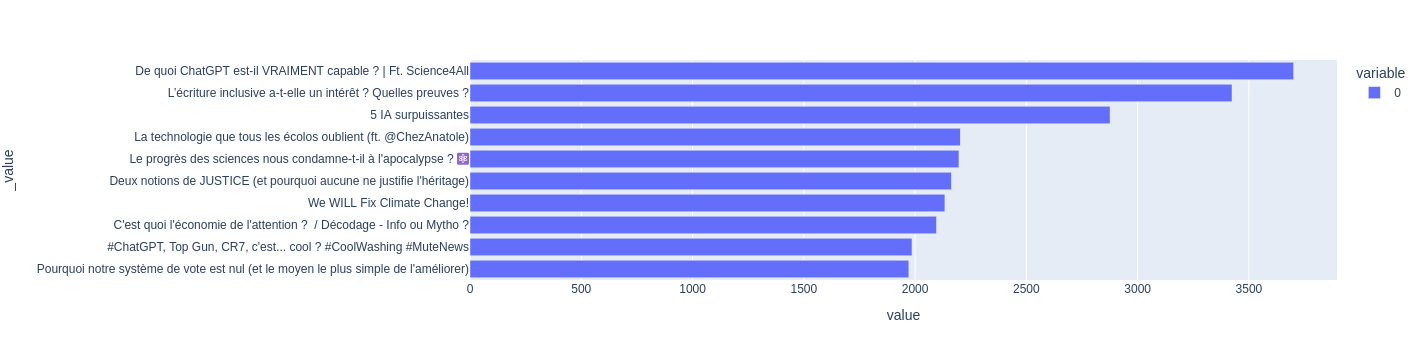

In [117]:
df_2.rename(index=correspondance_dict).head(10).sort_values(ascending=True).plot(kind="barh")

In [ ]:
import json
params = {'maxResults': '98', 'relevanceLanguage':'fr'}
text = requests.get(youtube_call_related, params=params).text

data = json.loads(text)["items"]

In [37]:
pd.options.plotting.backend = "plotly"

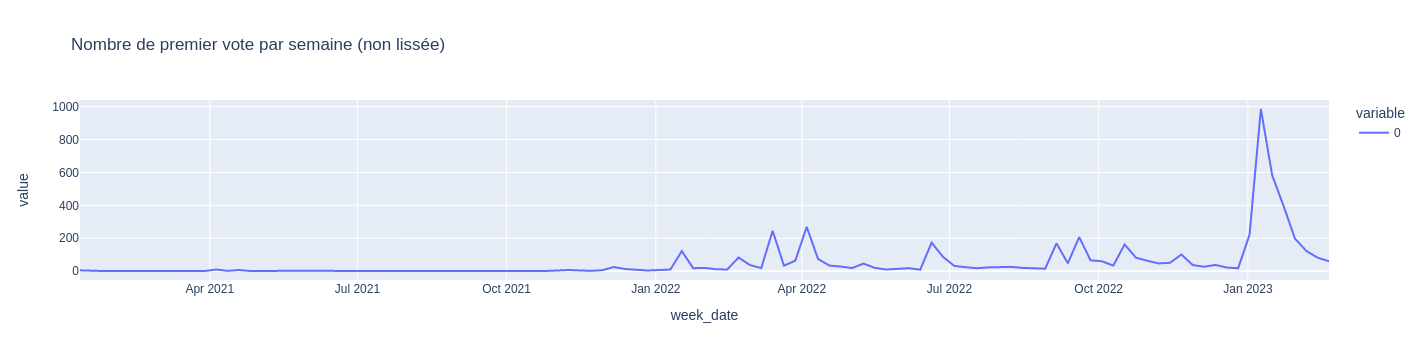

In [38]:
df.groupby("public_username").first().groupby("week_date").size().plot( title="Nombre de premier vote par semaine (non lissée)")

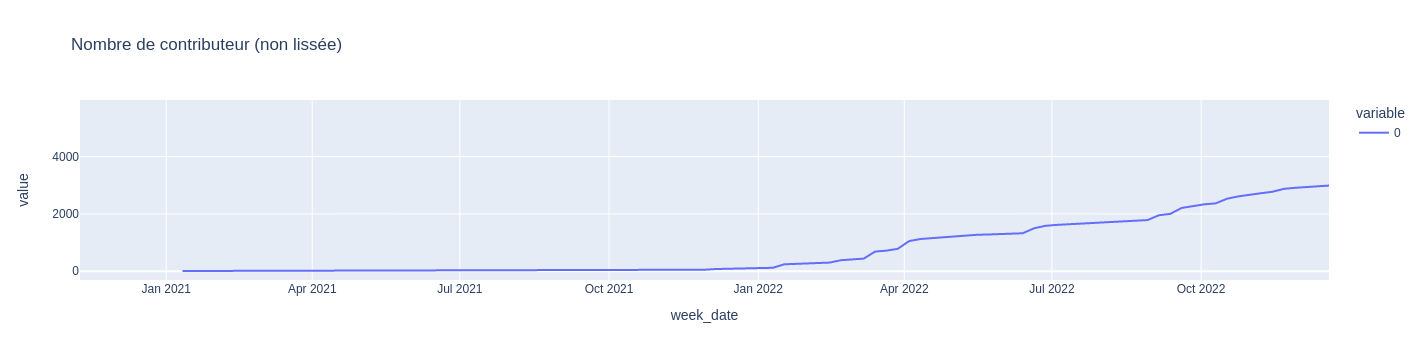

In [39]:
df.groupby("public_username").first().groupby("week_date").size().cumsum().plot( title="Nombre de contributeur (non lissée)")

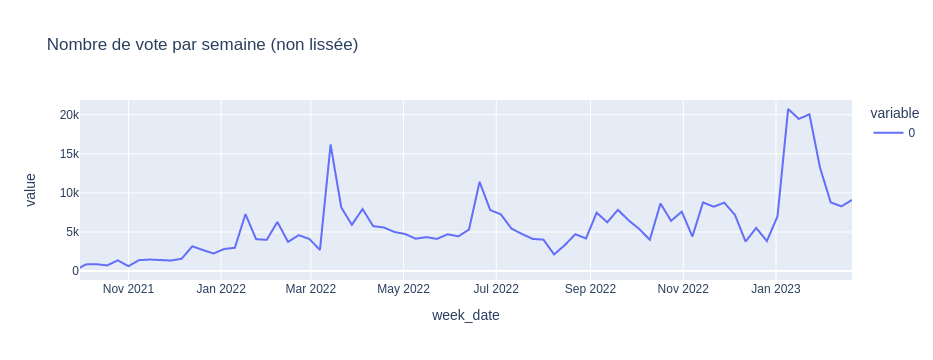

In [ ]:
df.groupby("week_date").size().plot( title="Nombre de vote par semaine (non lissée)")

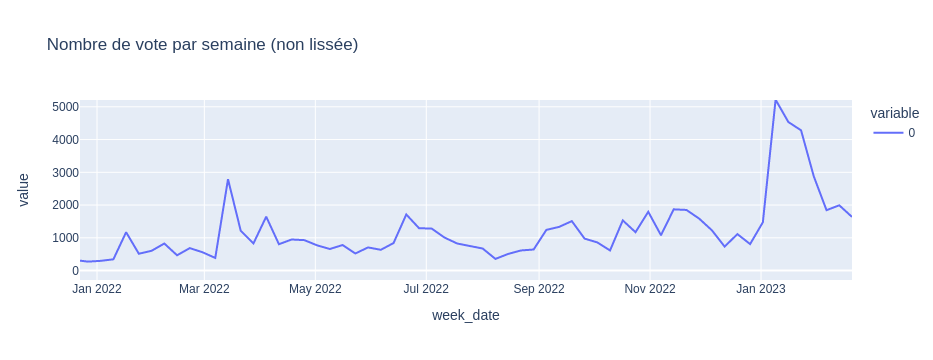

In [ ]:
df.query("criteria == 'largely_recommended'").groupby("week_date").size().plot( title="Nombre de vote par semaine (non lissée)")

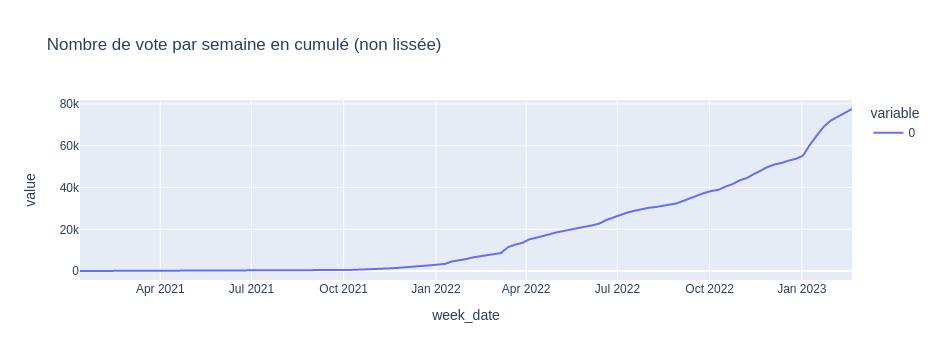

In [ ]:
df.query("criteria == 'largely_recommended'").groupby("week_date").size().cumsum().plot( title="Nombre de vote par semaine en cumulé (non lissée)")